# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
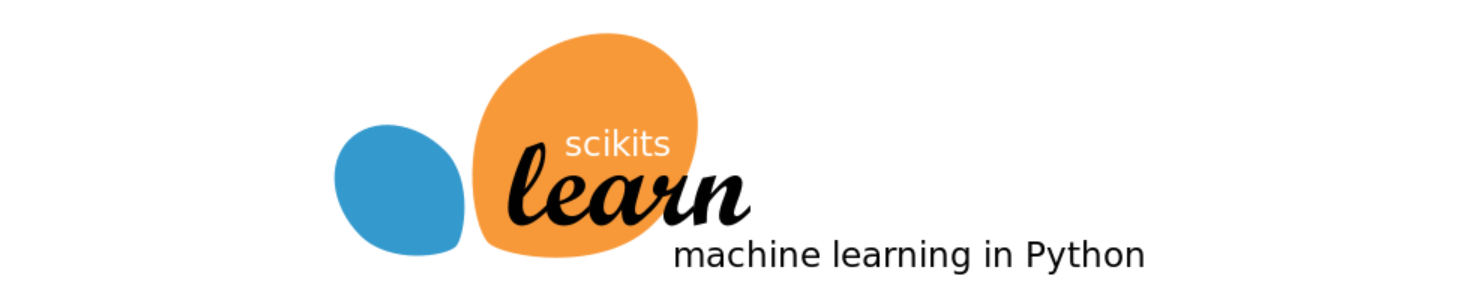

# 1. Import Libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from sklearn import datasets

In [30]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# 2. Load Data

In [31]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [32]:
X = boston.data
y = boston.target

# 3. Train test split

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
x_train.shape

(404, 13)

# 4. Simple Linear Model

In [69]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [70]:
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.748387627346083

In [71]:
model.score(x_test,y_test)

0.7070542881904366

# 5. Ridge Regularization for Linear Model

In [96]:
from sklearn.linear_model import Ridge,Lasso

modelr= Ridge(alpha=10)
modelr.fit(x_train, y_train)
modelr.score(x_train, y_train)

0.7348654452498389

In [97]:
modelr.score(x_test, y_test)

0.7110867579150313

# 6. Lasso Regularization for Linear Model

In [76]:
from sklearn.linear_model import Lasso
modelLS = Lasso(alpha=0.1)
modelLS.fit(x_train, y_train)
modelLS.score(x_train, y_train)

0.7297811083750073

In [77]:
modelLS.score(x_test, y_test)

0.7025733300907218

# 7. Polynomial Regression of degree 2

In [78]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2)
x_train_poly = pf.fit_transform(x_train)
x_test_poly =  pf.fit_transform(x_test)

In [79]:
modelp = LinearRegression()
modelp.fit(x_train_poly,y_train)
modelp.score(x_train_poly,y_train)

0.940063080980443

In [80]:
modelp.score(x_test_poly,y_test)

0.8255807844210556

# 8. Ridge Regularization for Polynomial model

In [98]:
from sklearn.linear_model import Ridge,Lasso

modelpr = Ridge(alpha=10)
modelpr.fit(x_train_poly, y_train)
modelpr.score(x_train_poly, y_train)

0.9305815710950859

In [99]:
modelpr.score(x_test_poly, y_test)

0.8323923839539035

# 9. Lasso Regularization for Polynomial model

In [100]:
from sklearn.linear_model import Lasso
modelpLS = Lasso(alpha=0.1)
modelpLS.fit(x_train_poly, y_train)
modelpLS.score(x_train_poly, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1601.602066233358, tolerance: 3.1597336336633663
  model = cd_fast.enet_coordinate_descent(


0.9113274884034782

In [101]:
modelpLS.score(x_test_poly, y_test)

0.8396087155219594

# 10. Select K Best

In [102]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

kb = SelectKBest(score_func=f_regression,k=13)
x_selected = kb.fit_transform(X,y)
x_selected.shape

(506, 13)

In [103]:
X.shape

(506, 13)

In [104]:
xtrain,xtest,ytrain,ytest = train_test_split(x_selected,y, random_state = 10)
xtrain.shape

(379, 13)

In [105]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

0.7575686094674801

In [106]:
lr.score(xtest,ytest)

0.6745585065949431

## Feature selection

In [53]:
df = pd.DataFrame(data = X,columns = boston.feature_names)
df['y'] = y
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT     y  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [54]:
corr = df.corr()
corr

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
y       -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT         y  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
y        0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

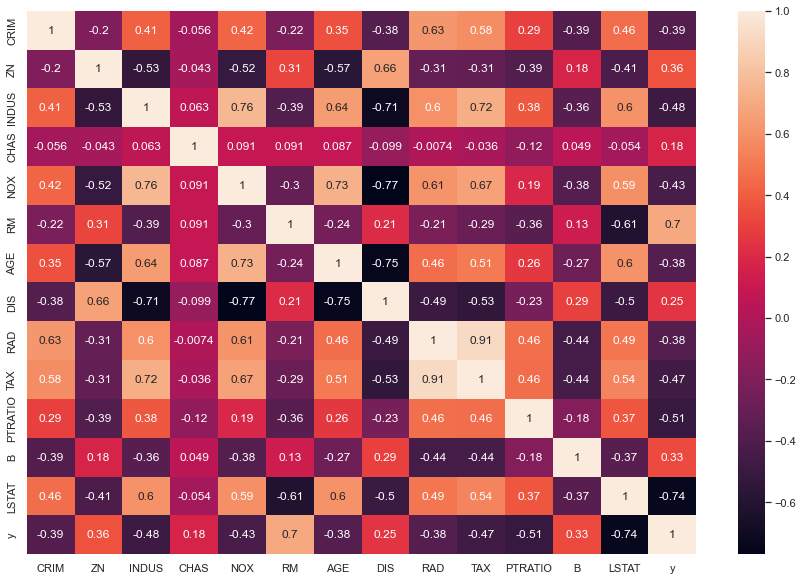

In [55]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(data = corr,annot = True)
plt.show()

In [60]:
columns = ['RM','LSTAT','PTRATIO','INDUS','TAX','NOX','CRIM']

In [61]:
sdf = df[columns]
sdf.head()

RM  LSTAT  PTRATIO  INDUS    TAX    NOX     CRIM
0  6.575   4.98     15.3   2.31  296.0  0.538  0.00632
1  6.421   9.14     17.8   7.07  242.0  0.469  0.02731
2  7.185   4.03     17.8   7.07  242.0  0.469  0.02729
3  6.998   2.94     18.7   2.18  222.0  0.458  0.03237
4  7.147   5.33     18.7   2.18  222.0  0.458  0.06905

Feature selection depend upon on the dataset, in this case even if we do feature selection there is no changes.

# 11. Conclusion

1.We use 'K best selection' to select the best column for our model.

2.The ridge and lasso regularization are used to prevent from having the overfitting and underfitting ing the model. We have to play with it and try to get the best value of 'alpha', which will give the best accuracy.

3.Feature selection depend upon on the dataset, in this case even if we do feature selection there is no changes.